In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import glob
import pandas as pd
import os
import seaborn as sns

from tqdm import tqdm
from statsmodels.distributions.empirical_distribution import ECDF
from collections import defaultdict
import pickle
import re
import json
from pathlib import Path


from open_spiel.python.algorithms.exploitability import nash_conv, best_response
from open_spiel.python.examples.ubc_plotting_utils import *


import bokeh
from bokeh.layouts import row, column
from bokeh.plotting import figure, show, output_file, save
from bokeh.io import output_notebook
from bokeh.models import HoverTool, ColumnDataSource, ColorBar, LogColorMapper, LinearColorMapper
from bokeh.transform import linear_cmap, log_cmap
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"



In [3]:
experiment = Experiment.objects.last()
experiment

<Experiment: mlp_lr_test_x2>

In [4]:
master_df = get_all_frames(experiment)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 18.46it/s]


In [21]:
!ls /shared/outputs

infocompare  minitest  test


In [28]:
plot_all_models(master_df, notebook=True)

Loading BokehJS ...

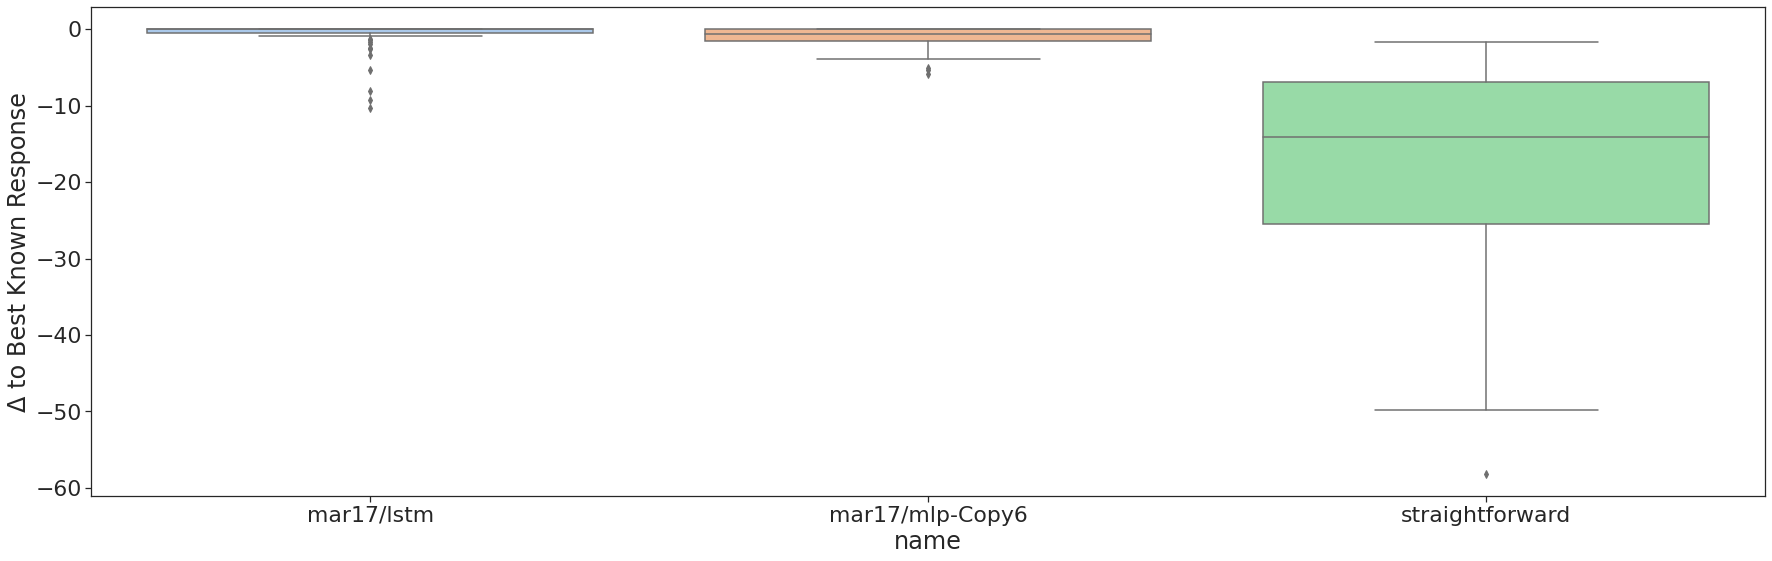

In [31]:
# s = ['_mlp', '_mlp_1', '_mlp_2', '_lstm', '_lstm_1', '_lstm_2', 'Straightforward']
good_configs = ['straightforward', 'mar17/lstm', 'mar17/mlp-Copy6']
fig = compare_best_responses(master_df.query('name in @good_configs'))
special_save_fig(fig, "configs.png", fmt=None, dpi=300, tight=True)

In [8]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(15, 5))
# plt.imshow(list(q_network.output_layer.parameters())[0].data)
# plt.colorbar()

In [ ]:
master_df[['name', 'PositiveRegret']]

In [32]:
x = master_df['name'].unique().tolist()
x.remove(None)
x.remove("straightforward")
x

['mar17/mlp-Copy3',
 'mar17/mlp-Copy4',
 'mar17/lstm',
 'mar17/mlp-Copy5',
 'mar17/mlp',
 'mar17/mlp-Copy6',
 'mar17/mlp-Copy1',
 'mar17/mlp-Copy2']

In [33]:
for config in x:
    portfolio = [config, 'straightforward']
    p = master_df.query('name in @portfolio and player == br_player').copy()
    # NOT QUITE RIGHT
    p['frac'] = p['PositiveRegret'] / p['MaxPositiveRegret']
    p = p.groupby(['model', 't', 'player']).apply(lambda x: x['frac'].max())
    print(config, p.mean())

mar17/mlp-Copy3 0.7614058178605272
mar17/mlp-Copy4 0.49276602000215386
mar17/lstm 0.968252645527716
mar17/mlp-Copy5 0.7614058178605272
mar17/mlp 0.46419470750173664
mar17/mlp-Copy6 0.9379200435531668
mar17/mlp-Copy1 0.49276602000215386
mar17/mlp-Copy2 0.7614058178605272


In [23]:
y = list(x)
y.remove('mar17/lstm')
for config in y:
    portfolio = [config, 'mar17/lstm', 'straightforward']
    p = master_df.query('name in @portfolio and player == br_player').copy()
    # NOT QUITE RIGHT
    p['frac'] = p['PositiveRegret'] / p['MaxPositiveRegret']
    p = p.groupby(['model', 't', 'player']).apply(lambda x: x['frac'].max())
    print(config, p.mean())

mar17/mlp-Copy3 0.9775554943429252
mar17/mlp-Copy4 0.9720118940452016
mar17/mlp-Copy5 0.9775554943429252
mar17/mlp 0.9682588179390447
mar17/mlp-Copy6 0.9999912929604747
mar17/mlp-Copy1 0.9720118940452016
mar17/mlp-Copy2 0.9775554943429252


In [ ]:
z = list(y)
z.remove('_mlp_deep_wide')
for config in z:
    portfolio = [config, '_mlp_deep_wide', '_mlp_wide', 'Straightforward']
    p = master_df.query('config in @portfolio and player == best_responder').copy()
    # NOT QUITE RIGHT
    p['frac'] = p['PositiveRegret'] / p['MaxPositiveRegret']
    p = p.groupby(['model', 't', 'player']).apply(lambda x: x['frac'].max())
    print(config, p.mean())

In [4]:
dir(bokeh.plotting)

['Column',
 'ColumnDataSource',
 'DEFAULT_TOOLS',
 'Document',
 'Figure',
 'GMap',
 'GridSpec',
 'Row',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_decorators',
 '_docstring',
 '_figure',
 '_graph',
 '_legends',
 '_plot',
 '_renderer',
 '_stack',
 '_tools',
 'annotations',
 'column',
 'curdoc',
 'figure',
 'from_networkx',
 'glyph_api',
 'gmap',
 'graph',
 'gridplot',
 'log',
 'logging',
 'markers',
 'output_file',
 'output_notebook',
 'reset_output',
 'row',
 'save',
 'show']

In [14]:
EquilibriumSolverRun.objects.last().pk

32